In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/Data set__1682565729-62fcaa4ea2bc0b6439d2306a (1).csv")

In [ ]:
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [ ]:
import pandas as pd

unique_values = df['club'].unique()
print(unique_values)

['Arsenal' 'Bournemouth' 'Brighton+and+Hove' 'Burnley' 'Chelsea'
 'Crystal+Palace' 'Everton' 'Huddersfield' 'Leicester+City' 'Liverpool'
 'Manchester+City' 'Manchester+United' 'Newcastle+United' 'Southampton'
 'Stoke+City' 'Swansea' 'Tottenham' 'Watford' 'West+Brom' 'West+Ham']


In [ ]:
unique_values = df['position'].unique()
print(unique_values)


['LW' 'AM' 'GK' 'RW' 'CB' 'RB' 'CF' 'LB' 'DM' 'RM' 'CM' 'SS' 'LM']


In [ ]:
unique_values = df['fpl_sel'].unique()
print(unique_values)


['17.10%' '5.60%' '5.90%' '1.50%' '0.70%' '13.70%' '2.50%' '4.70%' '4.00%'
 '1.00%' '2.00%' '1.80%' '0.00%' '5.10%' '1.70%' '0.10%' '0.50%' '0.80%'
 '4.20%' '0.20%' '0.40%' '6.90%' '26.50%' '10.40%' '15.00%' '19.80%'
 '0.60%' '0.90%' '1.60%' '11.50%' '1.10%' '3.30%' '9.30%' '2.10%' '4.10%'
 '8.00%' '3.20%' '4.80%' '0.30%' '1.30%' '13.50%' '2.90%' '1.20%' '2.30%'
 '3.00%' '12.00%' '12.40%' '12.30%' '7.80%' '18.50%' '20.30%' '7.50%'
 '9.00%' '5.00%' '13.80%' '6.40%' '20.90%' '10.50%' '2.70%' '10.90%'
 '1.40%' '16.40%' '10.00%' '13.10%' '6.30%' '14.60%' '3.60%' '2.40%'
 '2.60%' '3.50%' '5.50%' '30.80%' '5.30%' '7.10%' '4.50%' '6.60%' '4.30%'
 '17.50%' '9.70%' '3.80%' '8.80%' '15.20%' '4.60%' '45.00%' '26.10%'
 '6.20%' '19.50%' '10.20%' '7.70%' '17.00%' '5.20%' '11.40%' '2.80%'
 '7.30%' '11.30%' '11.20%' '4.90%' '2.20%' '6.00%' '8.70%' '18.80%'
 '38.60%' '35.10%' '12.60%' '13.30%' '3.10%' '17.30%' '3.40%' '5.40%'
 '11.80%' '20.70%' '6.50%' '7.20%']


In [ ]:
unique_values = df['nationality'].unique()
print(unique_values)


['Chile' 'Germany' 'Czech Republic' 'England' 'France' 'Spain' 'Nigeria'
 'Switzerland' 'Wales' 'Brazil' 'Egypt' 'Argentina' 'Colombia' 'Bosnia'
 'Norway' 'Poland' 'Scotland' 'Congo DR' 'Ireland' 'Netherlands'
 'Australia' "Cote d'Ivoire" 'Finland' 'Cameroon' 'Austria' 'Israel'
 'Northern Ireland' 'Canada' 'Belgium' 'Iceland' 'Serbia' 'Portugal'
 'Ghana' 'South Korea' 'Mali' 'Senegal' 'Curacao' 'Denmark' 'Slovenia'
 'Trinidad and Tobago' 'Bermuda' 'Benin' 'Algeria' 'Jamaica' 'Japan'
 'Tunisia' 'Croatia' 'Estonia' 'Ecuador' 'Armenia' 'Italy' 'Sweden'
 'United States' 'Morocco' 'The Gambia' 'Kenya' 'Greece' 'Uruguay'
 'Romania' 'Venezuela' 'New Zealand']


<ipython-input-148-192b4b393ed7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


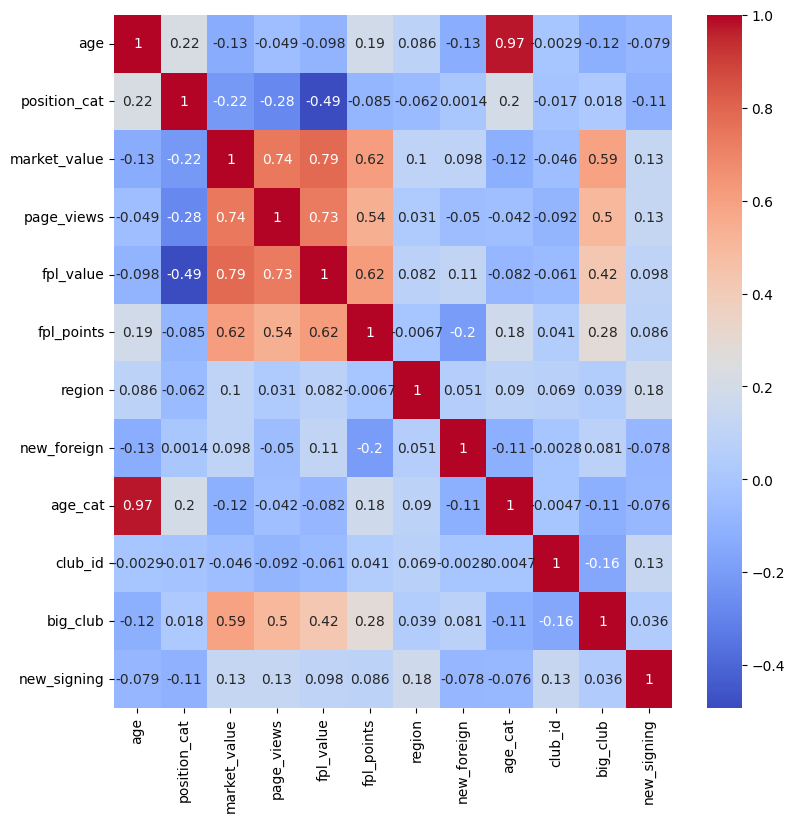

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

fpl_value, page_views are the highest correlated while region and age_cat are the lowest correlated


<ipython-input-149-59761476db37>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


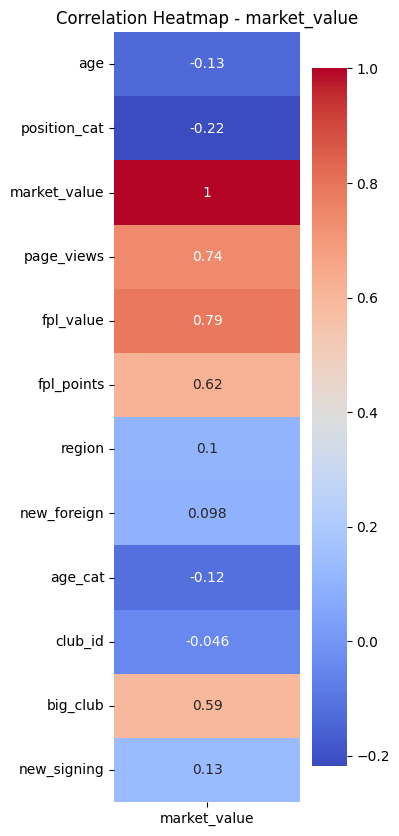

In [ ]:
feature = 'market_value'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations related to the selected feature
correlation_subset = correlation_matrix[[feature]]

# Create the heatmap
fig, ax = plt.subplots(figsize=(3, 10))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm')

# Set the plot title
plt.title(f'Correlation Heatmap - {feature}')

# Show the plot
plt.show()



In [ ]:
df['fpl_sel'] = df['fpl_sel'].str.replace('%', '')

In [ ]:
df['fpl_sel'] = df['fpl_sel'].astype('float')

In [ ]:
correlation_matrix = df.corr()

# Select the correlation values for the target column
correlation_with_target = correlation_matrix['market_value']

# Sort the correlation values in descending order
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Print the correlation values in descending order
print(correlation_sorted)

market_value    1.000000
fpl_value       0.788653
page_views      0.739657
fpl_points      0.615155
big_club        0.593483
fpl_sel         0.548703
new_signing     0.131321
region          0.101659
new_foreign     0.098056
club_id        -0.046068
age_cat        -0.117682
age            -0.132396
position_cat   -0.217637
Name: market_value, dtype: float64


<ipython-input-153-f1db021ec938>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


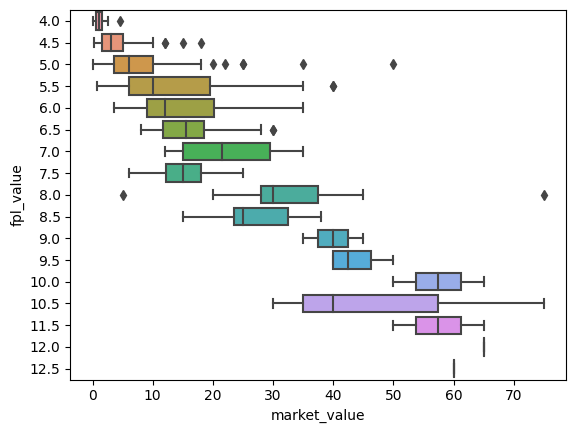

In [ ]:
sns.boxplot(y='fpl_value',x='market_value',data=df,orient='h')
plt.xlabel("market_value")
plt.show()

as fpl value increases market value increases as well

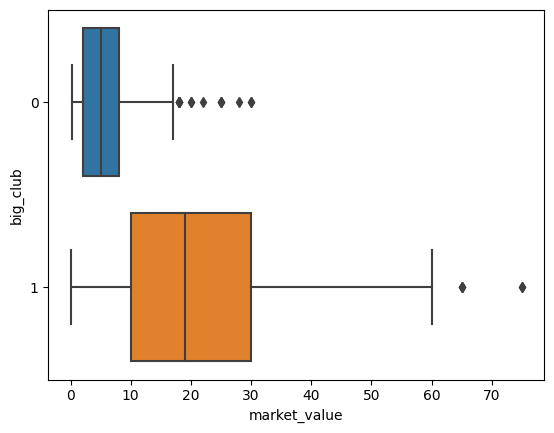

In [ ]:
sns.boxplot(y='big_club',x='market_value',data=df,orient='h')
plt.xlabel("market_value")
plt.show()

if their club is big their market vslue is higher

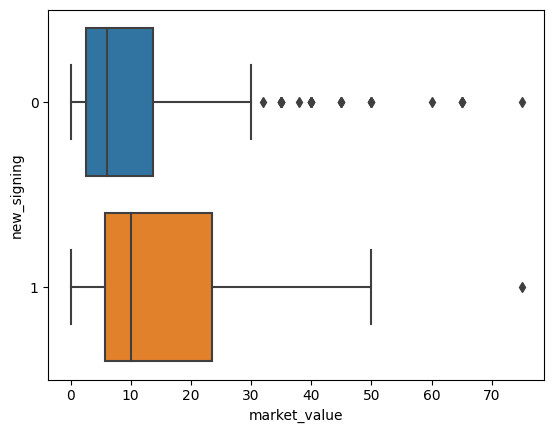

In [ ]:
sns.boxplot(y='new_signing',x='market_value',data=df,orient='h')
plt.xlabel("market_value")
plt.show()

if they are a new signing their market values are higher but old signings have more outliers with hiher market value

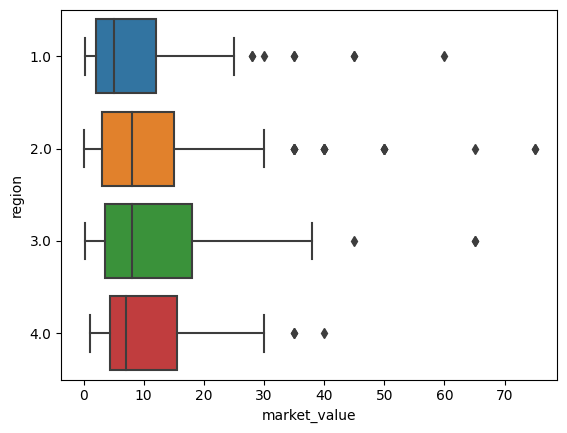

In [ ]:
sns.boxplot(y='region',x='market_value',data=df,orient='h')
plt.xlabel("market_value")
plt.show()

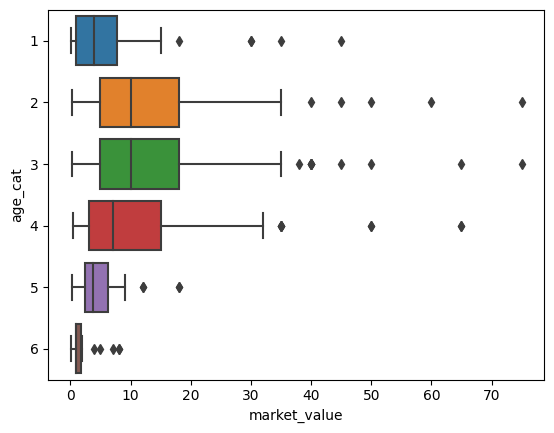

In [ ]:
sns.boxplot(y='age_cat',x='market_value',data=df,orient='h')
plt.xlabel("market_value")
plt.show()

age cat of 2, 3 have the highest market value while 6 have the lowest

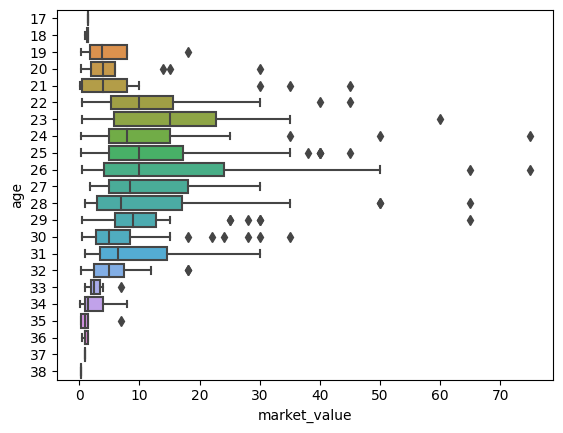

In [ ]:
sns.boxplot(y='age',x='market_value',data=df,orient='h')
plt.xlabel("market_value")
plt.show()

age 26 has the highest market value

<Axes: xlabel='market_value', ylabel='fpl_value'>

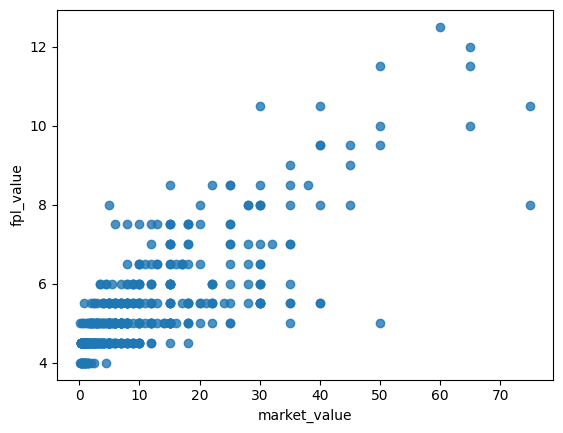

In [ ]:
sns.regplot(x="market_value", y="fpl_value", data=df, fit_reg=False)


as fpl value increses market value increses

<Axes: xlabel='market_value', ylabel='age_cat'>

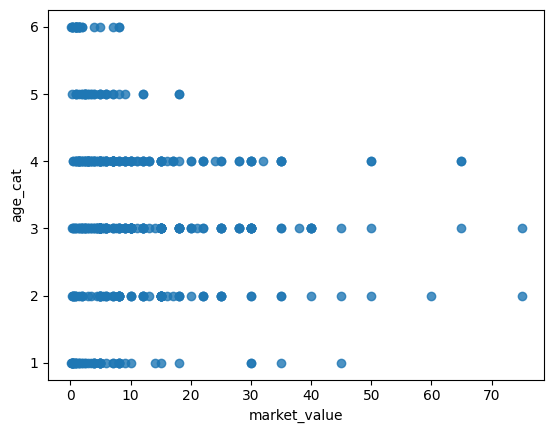

In [ ]:
sns.regplot(x="market_value", y="age_cat", data=df, fit_reg=False)


<Axes: xlabel='market_value', ylabel='age'>

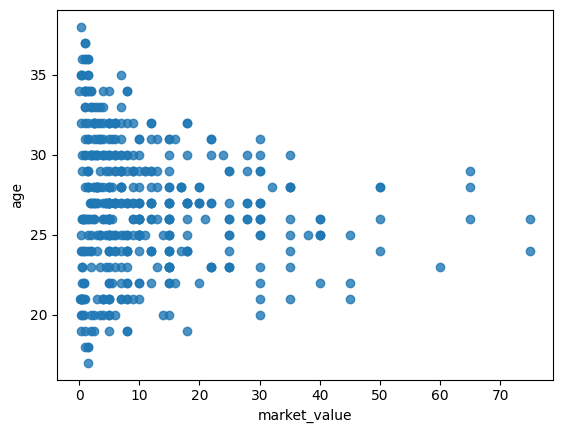

In [ ]:
sns.regplot(x="market_value", y="age", data=df, fit_reg=False)


In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.fillna(value = 0,inplace = True)
print(df)

                    name      club  age position  position_cat  market_value  \
0         Alexis Sanchez   Arsenal   28       LW             1          65.0   
1             Mesut Ozil   Arsenal   28       AM             1          50.0   
2              Petr Cech   Arsenal   35       GK             4           7.0   
3           Theo Walcott   Arsenal   28       RW             1          20.0   
4      Laurent Koscielny   Arsenal   31       CB             3          22.0   
..                   ...       ...  ...      ...           ...           ...   
456  Edimilson Fernandes  West+Ham   21       CM             2           5.0   
457       Arthur Masuaku  West+Ham   23       LB             3           7.0   
458            Sam Byram  West+Ham   23       RB             3           4.5   
459      Ashley Fletcher  West+Ham   21       CF             1           1.0   
460         Diafra Sakho  West+Ham   27       CF             1          10.0   

     page_views  fpl_value  fpl_sel  fp

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float64
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 61.4+ KB


In [ ]:
X = df.drop(['market_value', 'name', 'club', 'age', 'position', 'nationality'], axis=1)
y = df['market_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# **PERFORMING RFE**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error
# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

print("MAE: %.3f" % mae)
MSE = np.square(np.subtract(y_test, y_pred)).mean()
print("MSE: %.3f" % MSE)
r2

MAE: 3.504
MSE: 21.906


0.8190333784929126

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pandas as pd

# create a linear regression object
lr = LinearRegression()

# create the RFE object and specify the number of features to select
rfe = RFE(estimator=lr, n_features_to_select=8, step=1)

# fit the RFE object to the data
rfe.fit(X, y)

# print the selected features
print("Selected Features:")
print(X.columns[rfe.support_])

Selected Features:
Index(['position_cat', 'fpl_value', 'fpl_sel', 'region', 'new_foreign',
       'age_cat', 'big_club', 'new_signing'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float64
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 61.4+ KB


In [ ]:
X = df[['position_cat', 'fpl_value', 'fpl_sel', 'region', 'new_foreign', 'age_cat', 'big_club', 'new_signing']]
y = df['market_value']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# **SELECTING FEATURES**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pandas as pd

# create a linear regression object
lr = LinearRegression()

# create the RFE object and specify the number of features to select
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)

# fit the RFE object to the data
rfe.fit(X, y)

# print the selected features
print("Selected Features:")
print(X.columns[rfe.support_])

Selected Features:
Index(['position_cat', 'fpl_value', 'age_cat', 'big_club', 'new_signing'], dtype='object')


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create a linear regression object
model = LinearRegression()

# Create an RFE object with the linear regression model
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit the RFE object to the data
rfe.fit(X, y)

# Print the selected features
selected_features = rfe.support_
print("Selected Features:")
for i in range(len(selected_features)):
    if selected_features[i]:
        print(f"Feature {i+1}")

# Print the feature rankings
print("Feature Rankings:")
for i in range(len(rfe.ranking_)):
    print(f"Feature {i+1}: {rfe.ranking_[i]}")

Selected Features:
Feature 1
Feature 2
Feature 5
Feature 6
Feature 7
Feature 8
Feature Rankings:
Feature 1: 1
Feature 2: 1
Feature 3: 3
Feature 4: 2
Feature 5: 1
Feature 6: 1
Feature 7: 1
Feature 8: 1




# **final features**

In [ ]:
X = df[['position_cat', 'fpl_value', 'new_foreign', 'age_cat', 'big_club',
       'new_signing']]
y = df['market_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

from sklearn.metrics import mean_absolute_error
# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

print("MAE: %.3f" % mae)
MSE = np.square(np.subtract(y_test, y_pred)).mean()
print("MSE: %.3f" % MSE)
r2

MAE: 3.436
MSE: 20.938


0.8270338664896156

In [ ]:
X

,position_cat,fpl_value,new_foreign,age_cat,big_club,new_signing
0,1,12.0,0,4,1,0
1,1,9.5,0,4,1,0
2,4,5.5,0,6,1,0
3,1,7.5,0,4,1,0
4,3,6.0,0,4,1,0
...,...,...,...,...,...,...
456,2,4.5,0,1,0,1
457,3,4.5,0,2,0,1
458,3,4.5,0,2,0,0
459,1,4.5,0,1,0,1


# **OLS REGRESSION**

In [ ]:
import statsmodels.api as sm
import statsmodels.api as sm
# Add constant term to X array
X = sm.add_constant(X)

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary of model results
print(ols_model.summary())
metrics.mean_squared_error(y_test,y_pred)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_pred contains the predicted values and y_actual contains the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_pred contains the predicted values and y_actual contains the actual values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)


                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     199.3
Date:                Fri, 05 May 2023   Prob (F-statistic):          8.87e-124
Time:                        14:16:45   Log-Likelihood:                -1511.6
No. Observations:                 461   AIC:                             3037.
Df Residuals:                     454   BIC:                             3066.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -31.0197      2.140    -14.495   

# **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [ ]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 66.02
R squared test set 78.99


# **LASSO HYPERPARAMETER TUNING**

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
LassoCV(cv=5, max_iter=10000, random_state=0)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
model.alpha_


0.06526422224030301

In [ ]:
Lasso(alpha=0.06526422224030301)

Lasso(alpha=0.06526422224030301)

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.06526422224030301)

In [ ]:
print(list(zip(lasso_best.coef_, X)))

[(2.005947466211149, 'const'), (6.721851623186316, 'position_cat'), (-0.0, 'fpl_value'), (-0.503921958120846, 'new_foreign'), (6.874064518723824, 'age_cat'), (1.5465445067171228, 'big_club')]


In [ ]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 70.22
R squared test set 82.72


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)

print("MSE score:", np.sqrt(mean_squared_error(y_test, pred_lasso)))
print("R2 score:", r2_score(y_test, pred_lasso))

cv = 5  # Number of cross-validation folds
scores = cross_val_score(model_lasso, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)  # Force scores to be positive
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MSE score: 4.575772785882775
R2 score: 0.8270350630866116
Mean MAE: 4.430 (0.985)


# **RIDGE REGRESION**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedKFold

model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_train, y_train)
pred_Ridge = model_Ridge.predict(X_test)

print("MSE score:", np.sqrt(mean_squared_error(y_test, pred_Ridge)))
print("R2 score:", r2_score(y_test, pred_Ridge))

cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(model_Ridge, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)  # Force scores to be positive
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MSE score: 4.5756846950269505
R2 score: 0.8270417227191452
Mean MAE: 4.272 (0.276)


# **HYPERPARAMETER TUNING**

In [ ]:
from numpy import arange
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

# Define cross-validation method to evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the model
model = RidgeCV(alphas=arange(0.0001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

# Fit the model
model.fit(X, y)

# Display the lambda (alpha) that produced the lowest test MAE
print(model.alpha_)

0.9901


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedKFold

model_Ridge = Ridge(alpha=0.9901)
model_Ridge.fit(X_train, y_train)
pred_Ridge = model_Ridge.predict(X_test)

print("MSE score:", np.sqrt(mean_squared_error(y_test, pred_Ridge)))
print("R2 score:", r2_score(y_test, pred_Ridge))

cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(model_Ridge, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)  # Force scores to be positive
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MSE score: 4.575684012597513
R2 score: 0.82704177431003
Mean MAE: 4.272 (0.276)


# **Nearest neighbour regression**

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_nnr = neighbors.KNeighborsRegressor(n_neighbors = K)

    model_nnr.fit(X_train, y_train)  #fit the model
    pred=model_nnr.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6.580302146868791
RMSE value for k=  2 is: 5.566079704744614
RMSE value for k=  3 is: 4.6473901027377815
RMSE value for k=  4 is: 4.542118084500709
RMSE value for k=  5 is: 4.219043360967084
RMSE value for k=  6 is: 4.074192827095159
RMSE value for k=  7 is: 4.187008104405752
RMSE value for k=  8 is: 4.467052557531343
RMSE value for k=  9 is: 4.3914276643066374
RMSE value for k=  10 is: 4.474010943742894
RMSE value for k=  11 is: 4.492901947603503
RMSE value for k=  12 is: 4.666277505534993
RMSE value for k=  13 is: 4.8093840530548135
RMSE value for k=  14 is: 4.943542887156541
RMSE value for k=  15 is: 4.9843527804903935
RMSE value for k=  16 is: 4.980005015438945
RMSE value for k=  17 is: 5.137164620472594
RMSE value for k=  18 is: 5.128237362761709
RMSE value for k=  19 is: 5.157980159947721
RMSE value for k=  20 is: 5.189623033629976


<Axes: >

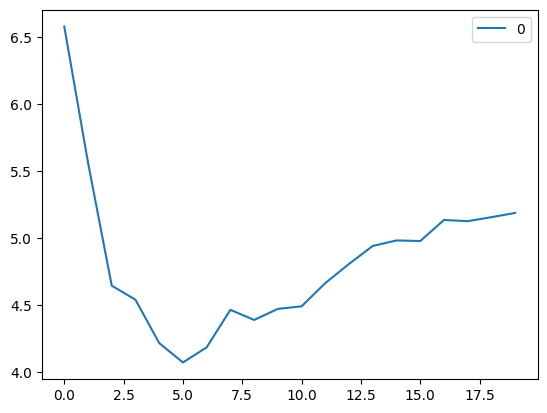

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# **hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

knn = neighbors.KNeighborsRegressor()

model_nnr = GridSearchCV(knn, params, cv=5)
model_nnr.fit(X_train,y_train)
model_nnr.best_params_

{'n_neighbors': 7}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, RepeatedKFold
from numpy import mean, std, absolute

# Define the number of neighbors (k)
k = 7

# Define the KNN regression model
model_nnr = KNeighborsRegressor(n_neighbors=k)

# Define cross-validation method to evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using R2 score and MAE
r2_scores = cross_val_score(model_nnr, X, y, scoring='r2', cv=cv, n_jobs=-1)
mae_scores = cross_val_score(model_nnr, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
mae_scores = absolute(mae_scores)

# Print the mean R2 score and its standard deviation
print('Mean R2 score: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))

# Print the mean MAE and its standard deviation
print('Mean MAE: %.3f (%.3f)' % (mean(mae_scores), std(mae_scores)))


Mean R2 score: 0.578 (0.125)
Mean MAE: 5.004 (0.817)


# **TREE RGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeReg=DecisionTreeRegressor()
DecisionTreeReg.fit(X_train,y_train)
pred_tree=DecisionTreeReg.predict(X_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_tree)))
print("R2 score:",r2_score(y_test, pred_tree))

MSE score: 6.2513991862735
R2 score: 0.6771627535317587


# **GRADIENT BOOSTED REGRESSION**

MSE score: 4.56542453929099
R2 score: 0.8278165091787844


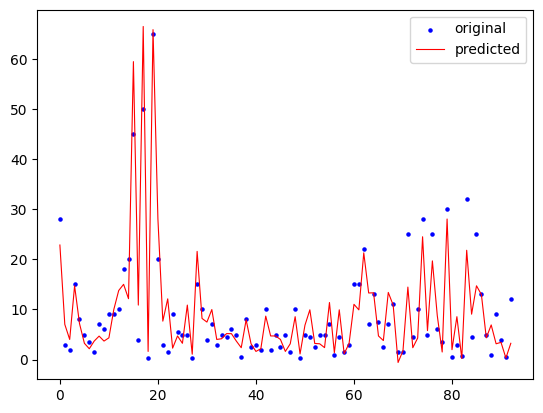

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# with new parameters
gbr = GradientBoostingRegressor(n_estimators=600,
    max_depth=7,
    learning_rate=0.01,
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

pred_gradient = gbr.predict(X_test)
print("MSE score:", np.sqrt(mean_squared_error(y_test, pred_gradient)))
print("R2 score:", r2_score(y_test, pred_gradient))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_gradient, lw=0.8, color="red", label="predicted")  # Fix: replace ypred with pred_gradient
plt.legend()
plt.show()


# **hyperparameter tuning**

Depth: 1
MSE score: 23.269299008964822
R2 score: 0.807773848561441

Depth: 2
MSE score: 20.43244032667955
R2 score: 0.8312089518905386

Depth: 3
MSE score: 20.166007659121394
R2 score: 0.8334099346654165

Depth: 4
MSE score: 21.20804600545941
R2 score: 0.8248017242981516

Depth: 5
MSE score: 23.931514423463636
R2 score: 0.8023033304979894

Depth: 6
MSE score: 21.073551540215824
R2 score: 0.825912774245707

Depth: 7
MSE score: 19.809429328162242
R2 score: 0.8363556048474127

Depth: 8
MSE score: 22.224482216477956
R2 score: 0.8164050114899312

Depth: 9
MSE score: 22.66764230286368
R2 score: 0.8127440951106157

Depth: 10
MSE score: 21.39710333703628
R2 score: 0.8232399340939747

Depth: 11
MSE score: 21.346019846755265
R2 score: 0.8236619314534561

Depth: 12
MSE score: 20.92694856793963
R2 score: 0.8271238517749119

Depth: 13
MSE score: 21.057331529299464
R2 score: 0.826046766691012



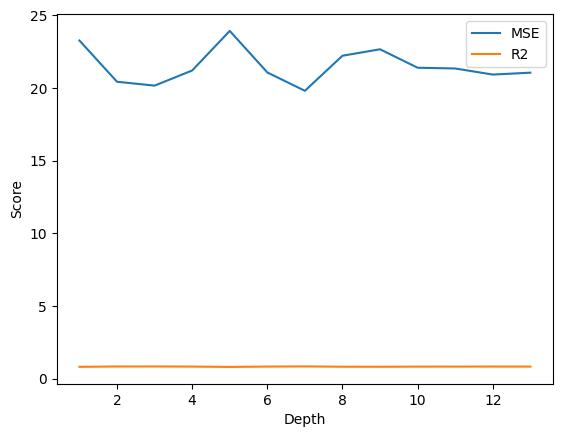

In [ ]:
depth_values = range(1, 14)

mse_scores = []
r2_scores = []

# Iterate over the depth values
for depth in depth_values:
    # Create the Gradient Boosting Regressor with the specified depth
    gbr = GradientBoostingRegressor(n_estimators=600, max_depth=depth, learning_rate=0.01, min_samples_split=3)

    # Fit the model on the training data
    gbr.fit(X_train, y_train)

    # Make predictions on the test data
    pred_gradient = gbr.predict(X_test)

    # Calculate the MSE score
    mse_score = mean_squared_error(y_test, pred_gradient)
    mse_scores.append(mse_score)

    # Calculate the R2 score
    r2 = r2_score(y_test, pred_gradient)
    r2_scores.append(r2)

    print("Depth:", depth)
    print("MSE score:", mse_score)
    print("R2 score:", r2)
    print()

# Plotting the MSE and R2 scores
plt.plot(depth_values, mse_scores, label="MSE")
plt.plot(depth_values, r2_scores, label="R2")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

# **RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the regressor with x and y data
regressor_rf.fit(X, y)

RandomForestRegressor(random_state=0)

In [ ]:
regressor_rf.score(X_test, y_test)

0.9739530943338126

In [ ]:
regressor_rf.score(X_test, y_test)
# Print the mean MAE and its standard deviation
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.578 (0.125)


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)

31.210004018401072

# **SUPPORT VECTOR REGRESSION**

Mean Squared Error (MSE): 57.86995801427024
R2 Score: 0.5727505986285979


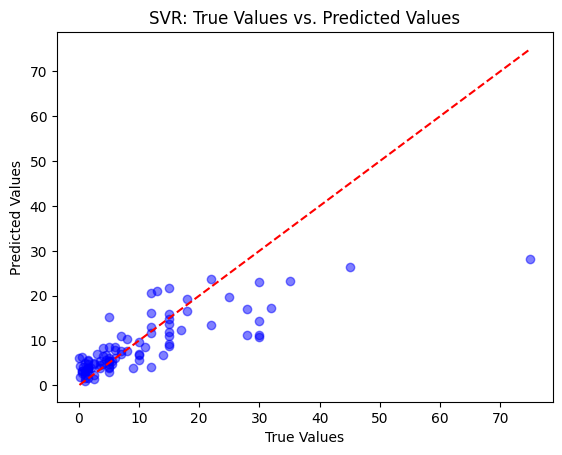

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create an instance of SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the SVR model on the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

# Plot the predicted values against the true values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVR: True Values vs. Predicted Values')
plt.show()


In [ ]:
import numpy as np

# Calculate the IQR and outlier bounds
Q1 = np.percentile(df['market_value'], 25)
Q3 = np.percentile(df['market_value'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[(df['market_value'] >= lower_bound) & (df['market_value'] <= upper_bound)]

# Print the filtered dataframe
print(df_filtered)


                    name      club  age position  position_cat  market_value  \
2              Petr Cech   Arsenal   35       GK             4           7.0   
3           Theo Walcott   Arsenal   28       RW             1          20.0   
4      Laurent Koscielny   Arsenal   31       CB             3          22.0   
5        Hector Bellerin   Arsenal   22       RB             3          30.0   
6         Olivier Giroud   Arsenal   30       CF             1          22.0   
..                   ...       ...  ...      ...           ...           ...   
456  Edimilson Fernandes  West+Ham   21       CM             2           5.0   
457       Arthur Masuaku  West+Ham   23       LB             3           7.0   
458            Sam Byram  West+Ham   23       RB             3           4.5   
459      Ashley Fletcher  West+Ham   21       CF             1           1.0   
460         Diafra Sakho  West+Ham   27       CF             1          10.0   

     page_views  fpl_value  fpl_sel  fp

In [ ]:
df_filtered

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0
5,Hector Bellerin,Arsenal,22,RB,3,30.0,1675,6.0,13.7,119,2.0,Spain,0,2,1,1,0
6,Olivier Giroud,Arsenal,30,CF,1,22.0,2230,8.5,2.5,116,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.4,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.2,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.3,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.9,16,1.0,England,0,1,20,0,1


Mean Squared Error (MSE): 57.56521201555624
R2 Score: 0.5244575628070309


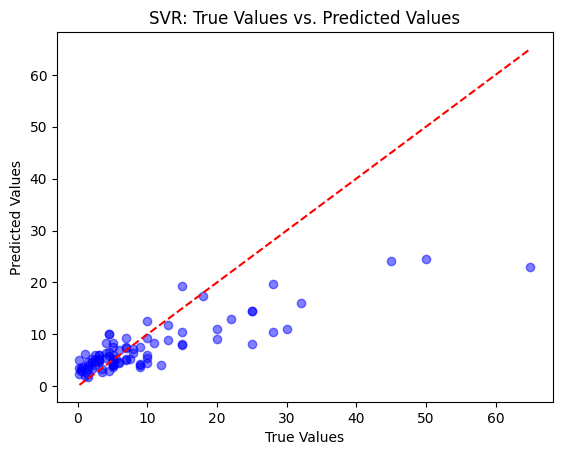

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create an instance of SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the SVR model on the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

# Plot the predicted values against the true values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVR: True Values vs. Predicted Values')
plt.show()


# **hyperparameter tuning svr**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

# Create an instance of SVR
svr = SVR()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new SVR model with the best hyperparameters
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

# Fit the SVR model on the training data
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)
print("Mean Absolute Error (MAE):", mae)


Best Hyperparameters: {'C': 10, 'epsilon': 0.001, 'kernel': 'linear'}
Mean Squared Error (MSE): 21.935043310785357
R2 Score: 0.8187960472876336
Mean Absolute Error (MAE): 3.507196108359975


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# **checking for overfitting**

In [ ]:
# Make predictions on the training data
y_pred_train = best_svr.predict(X_train)

# Calculate evaluation metrics on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Make predictions on the validation data
y_pred_val = best_svr.predict(X_val)

# Calculate evaluation metrics on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics
print("Training Set Evaluation:")
print("Mean Squared Error (MSE):", mse_train)
print("R2 Score:", r2_train)
print("Mean Absolute Error (MAE):", mae_train)
print("")

print("Validation Set Evaluation:")
print("Mean Squared Error (MSE):", mse_val)
print("R2 Score:", r2_val)
print("Mean Absolute Error (MAE):", mae_val)


Training Set Evaluation:
Mean Squared Error (MSE): 51.59178429737592
R2 Score: 0.6848955265235224
Mean Absolute Error (MAE): 4.553538355977076

Validation Set Evaluation:
Mean Squared Error (MSE): 30.22946004002782
R2 Score: 0.7560937102826131
Mean Absolute Error (MAE): 4.108564705331276


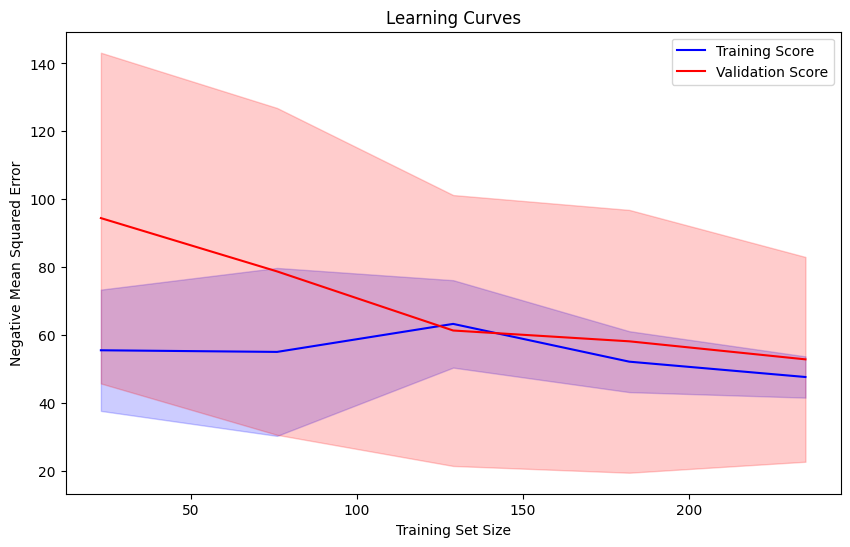

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the SVR model with the best hyperparameters
svr_model = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

# Generate the learning curves
train_sizes, train_scores, val_scores = learning_curve(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a Random Forest regressor object
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the regressor with X and y data
regressor_rf.fit(X_train, y_train)

# Calculate the training set R2 score
train_r2 = regressor_rf.score(X_train, y_train)

# Calculate the validation set R2 score
val_r2 = regressor_rf.score(X_val, y_val)

# Print the R2 scores
print("Training Set R2 Score:", train_r2)
print("Validation Set R2 Score:", val_r2)

# Perform cross-validation
cv_scores = cross_val_score(regressor_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores

# Calculate the mean MSE and its standard deviation
mean_mse = np.mean(cv_mse_scores)
std_mse = np.std(cv_mse_scores)

# Print the mean MSE and its standard deviation
print("Mean MSE: %.3f" % mean_mse)
print("Standard Deviation of MSE: %.3f" % std_mse)

# Grid search for hyperparameter tuning
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1, 2, 3, 4],
}

regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = clf.predict(X_train)

# Calculate the mean squared error on the training set
mse_train = mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error (MSE) on Training Set:", mse_train)


Training Set R2 Score: 0.9332885761399458
Validation Set R2 Score: 0.7312055587614494
Mean MSE: 47.550
Standard Deviation of MSE: 29.971
Mean Squared Error (MSE) on Training Set: 32.239099224313506


# **Slight case of overfitting noticed**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create an instance of GradientBoostingRegressor with desired parameters
gbr = GradientBoostingRegressor(n_estimators=600, max_depth=7, learning_rate=0.01, min_samples_split=3)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Calculate predictions on the validation set
pred_val = gbr.predict(X_val)

# Calculate predictions on the train set
pred_train = gbr.predict(X_train)

# Calculate predictions on the test set
pred_test = gbr.predict(X_test)

# Calculate evaluation metrics for validation set
val_r2 = r2_score(y_val, pred_val)
val_mse = mean_squared_error(y_val, pred_val)
val_mae = mean_absolute_error(y_val, pred_val)

# Calculate evaluation metrics for train set
train_r2 = r2_score(y_train, pred_train)
train_mse = mean_squared_error(y_train, pred_train)
train_mae = mean_absolute_error(y_train, pred_train)

# Calculate evaluation metrics for test set
test_r2 = r2_score(y_test, pred_test)
test_mse = mean_squared_error(y_test, pred_test)
test_mae = mean_absolute_error(y_test, pred_test)

# Print evaluation metrics
print("Validation Set R2 Score:", val_r2)
print("Validation Set MSE:", val_mse)
print("Validation Set MAE:", val_mae)
print("Train Set R2 Score:", train_r2)
print("Train Set MSE:", train_mse)
print("Train Set MAE:", train_mae)
print("Test Set R2 Score:", test_r2)
print("Test Set MSE:", test_mse)
print("Test Set MAE:", test_mae)



Validation Set R2 Score: 0.6729863586070535
Validation Set MSE: 40.52968792435111
Validation Set MAE: 4.698039194999104
Train Set R2 Score: 0.953668084261873
Train Set MSE: 7.585884695553472
Train Set MAE: 1.7930421000622971
Test Set R2 Score: 0.7804898849622376
Test Set MSE: 26.572068701789377
Test Set MAE: 3.3711566563474356


# **Increased test size to address the problem of overfitting**

In [ ]:
X = df[['position_cat', 'fpl_value', 'new_foreign', 'age_cat', 'big_club',
       'new_signing']]
y = df['market_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# **Model selection : gradient boosted regression as it has test r2 = 0.83 as compared to all the other models**

gradient boosted regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create an instance of GradientBoostingRegressor with desired parameters
gbr = GradientBoostingRegressor(n_estimators=600, max_depth=7, learning_rate=0.01, min_samples_split=3)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Calculate predictions on the validation set
pred_val = gbr.predict(X_val)

# Calculate predictions on the train set
pred_train = gbr.predict(X_train)

# Calculate predictions on the test set
pred_test = gbr.predict(X_test)

# Calculate evaluation metrics for validation set
val_r2 = r2_score(y_val, pred_val)
val_mse = mean_squared_error(y_val, pred_val)
val_mae = mean_absolute_error(y_val, pred_val)

# Calculate evaluation metrics for train set
train_r2 = r2_score(y_train, pred_train)
train_mse = mean_squared_error(y_train, pred_train)
train_mae = mean_absolute_error(y_train, pred_train)

# Calculate evaluation metrics for test set
test_r2 = r2_score(y_test, pred_test)
test_mse = mean_squared_error(y_test, pred_test)
test_mae = mean_absolute_error(y_test, pred_test)

# Print evaluation metrics
print("Validation Set R2 Score:", val_r2)
print("Validation Set MSE:", val_mse)
print("Validation Set MAE:", val_mae)
print("Train Set R2 Score:", train_r2)
print("Train Set MSE:", train_mse)
print("Train Set MAE:", train_mae)
print("Test Set R2 Score:", test_r2)
print("Test Set MSE:", test_mse)
print("Test Set MAE:", test_mae)


Validation Set R2 Score: 0.9317165299137352
Validation Set MSE: 8.462973352425323
Validation Set MAE: 2.0781523864992963
Train Set R2 Score: 0.9434306103745751
Train Set MSE: 8.83733232837564
Train Set MAE: 1.984308105105798
Test Set R2 Score: 0.8357075534232017
Test Set MSE: 19.887877043263956
Test Set MAE: 3.124458284380722


random forest regressor

In [ ]:
y_pred_test = clf.predict(X_test)

test_r2 = r2_score(y_test, y_pred_test)

test_mse = mean_squared_error(y_test, y_pred_test)

test_mae = mean_absolute_error(y_test, y_pred_test)

print("Test Set R2 Score:", test_r2)
print("Test Set MSE:", test_mse)
print("Test Set MAE:", test_mae)

y_pred_train = clf.predict(X_train)

train_r2 = r2_score(y_train, y_pred_train)

train_mse = mean_squared_error(y_train, y_pred_train)

train_mae = mean_absolute_error(y_train, y_pred_train)

print("Train Set R2 Score:", train_r2)
print("Train Set MSE:", train_mse)
print("Train Set MAE:", train_mae)

y_pred_val = clf.predict(X_val)

val_r2 = r2_score(y_val, y_pred_val)

val_mse = mean_squared_error(y_val, y_pred_val)

val_mae = mean_absolute_error(y_val, y_pred_val)

print("Validation Set R2 Score:", val_r2)
print("Validation Set MSE:", val_mse)
print("Validation Set MAE:", val_mae)


Test Set R2 Score: 0.7061730990911437
Test Set MSE: 30.10428933903137
Test Set MAE: 3.842573301525556
Train Set R2 Score: 0.8289569755290316
Train Set MSE: 30.537738150843246
Train Set MAE: 4.044141585821272
Validation Set R2 Score: 0.8055723000391732
Validation Set MSE: 24.097141543379205
Validation Set MAE: 3.6575071703175888


# **GENETIC ALGORITHM**

In [ ]:
import csv
import random as rand
import math
import operator


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    # print('Distances: ')
    # print(*distances, sep=",")
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(min(k, len(distances))):
        neighbors.append(distances[x][0])
    return neighbors


def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        #print('Neighbors: ' + neighbors[x][-1])
        #print(classVotes)
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    # print(classVotes)#coba1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct = correct+1
    return (correct / float(len(testSet))) * 100.0


def generateChromosome(chromosome):
    return [rand.randint(1, 100) for x in range(chromosome)]


def desimal(biner):
    return int(biner, 2)


def kNN(k, testSet, trainingSet):
    # generate predictions
    predictions = []
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    #print('Accuracy: ' + repr(accuracy) + '%')
    return accuracy


def crossover(one, two):
    parent = [one, two]
    zero = '0'
    male = "{0:b}".format(parent[0])
    female = "{0:b}".format(parent[1])
    length = max(len(male), len(female))
    if length % 2 == 1:
        length = length + 1
    while len(male) < length:
        male = zero + male

    while len(female) < length:
        female = zero + female

    child = []
    half = int(length / 2)
    male1 = male[:half]
    male2 = male[half:]

    female1 = female[:half]
    female2 = female[half:]

    child.append(desimal(male1 + female2))
    child.append(desimal(female1 + male2))
    return child



# prepare data
trainingSet = x_train
testSet = x_test
split = 0.67

print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))

accResult = [[]]
chromosome = 10
population = generateChromosome(chromosome)

for x in range(len(population)):
  accResult.append([population[x], kNN(population[x], testSet, trainingSet)])

del accResult[0]

for x in range(200):
        status_one = True
        status_zero = True
        accResult = sorted(accResult, key=lambda l: l[1], reverse=True)
        newChromosome = crossover(accResult[0][0], accResult[1][0])
        for i in accResult:
            if newChromosome[0] == i[0]:
                status_zero = False;
            if newChromosome[1] == i[0]:
                status_one = False
        if status_zero:
            accResult.append([newChromosome[0], kNN(newChromosome[0], testSet, trainingSet)])
        if status_one:
            accResult.append([newChromosome[1], kNN(newChromosome[1], testSet, trainingSet)])

accResult = sorted(accResult, key=lambda l: l[1],reverse=True)
print("accuracy: \n")
print(accResult[0][1])

Train set: 276
Test set: 185
accuracy: 

87.56756756756758


# **restful api deploy**


In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install flask
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
from flask import Flask, render_template, request, Response
app = Flask(__name__)

df = pd.read_csv('/content/Data set__1682565729-62fcaa4ea2bc0b6439d2306a (1).csv')

df1 = df
df1.drop(["name","club","position","nationality","fpl_sel", "club_id", "nationality", "region", "fpl_points", "fpl_value", "page_views", "age"], axis='columns', inplace=True)

x = df1[df1.columns[~df1.columns.isin(["market_value"])]].to_numpy()
y = df1.market_value.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

@app.route("/", methods=['GET','POST'])
def index():
    return render_template("ml_assignment.html")

@app.route("/data", methods=['GET','POST'])
def data():
    if request.method == "POST":
         opt = request.form['excellent']
         m = int(opt) * 1
         a = request.form['position_cat']
         b = request.form['fpl_value']
         c = request.form['new_foreign']
         d = request.form['age_cat']
         e = request.form['big_club']
         f = request.form['new_signing']
         li = [a, b, c, d, e, f]
         model = gbr()
         model.fit(x_train, y_train)
         y_pred_svr = model.predict(x_test)
         market_value = model.predict([li])
    return render_template("ml_data.html", market_value=market_value)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
